# Pie Chart Example from SO: http://stackoverflow.com/questions/33019879/hierarchic-pie-donut-chart-from-pandas-dataframe-using-bokeh-or-matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

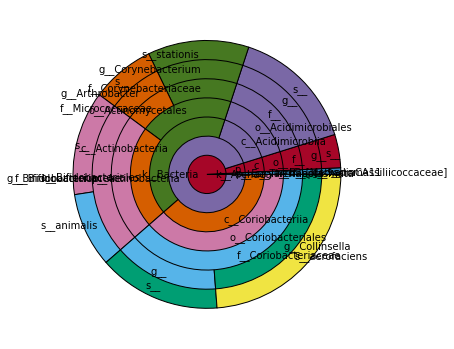

In [15]:

df = pd.read_csv('species.csv')
df = df.dropna() # Drop the "no hits" line
df['A'] = np.random.rand(len(df)) * 100 + 1

# Do the summing to get the values for each layer
def nested_pie(df):

    cols = df.columns.tolist()
    outd = {}
    gb = df.groupby(cols[0], sort=False).sum()
    outd[0] = {'names':gb.index.values, 'values':gb.values}
    for lev in range(1,7):
        gb = df.groupby(cols[:(lev+1)], sort=False).sum()
        outd[lev] = {'names':gb.index.levels[lev][gb.index.labels[lev]].tolist(),
                     'values':gb.values}
    return outd

outd = nested_pie(df)
diff = 1/7.0

fig = plt.figure(figsize=(6,6))

# This first pie chart fill the plot, it's the lowest level
plt.pie(outd[6]['values'], labels=outd[6]['names'], labeldistance=0.9,
        colors=plt.style.library['bmh']['axes.color_cycle'])
ax = plt.gca()
# For each successive plot, change the max radius so that they overlay
for i in np.arange(5,-1,-1):
    ax.pie(outd[i]['values'], labels=outd[i]['names'], 
           radius=np.float(i+1)/7.0, labeldistance=((2*(i+1)-1)/14.0)/((i+1)/7.0),
           colors=plt.style.library['bmh']['axes.color_cycle'])
ax.set_aspect('equal')

fig.savefig("PieChart.pdf")

In [18]:
df

,kingdom,philum,class,order,family,genus,species,A
1,k__Archaea,p__Euryarchaeota,c__Thermoplasmata,o__E2,f__[Methanomassiliicoccaceae],g__vadinCA11,s__,2.984874
2,k__Bacteria,p__,c__,o__,f__,g__,s__,15.030428
3,k__Bacteria,p__Actinobacteria,c__Acidimicrobiia,o__Acidimicrobiales,f__,g__,s__,56.575792
4,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Corynebacteriaceae,g__Corynebacterium,s__stationis,45.635717
5,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Micrococcaceae,g__Arthrobacter,s__,28.835476
6,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Bifidobacteriales,f__Bifidobacteriaceae,g__Bifidobacterium,s__,46.945894
7,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Bifidobacteriales,f__Bifidobacteriaceae,g__Bifidobacterium,s__animalis,33.646990
8,k__Bacteria,p__Actinobacteria,c__Coriobacteriia,o__Coriobacteriales,f__Coriobacteriaceae,g__,s__,55.280283
9,k__Bacteria,p__Actinobacteria,c__Coriobacteriia,o__Coriobacteriales,f__Coriobacteriaceae,g__Collinsella,s__aerofaciens,88.968366


In [17]:
outd

{0: {'names': array(['k__Archaea', 'k__Bacteria'], dtype=object),
  'values': array([[   2.98487447],
         [ 370.91894595]])},
 1: {'names': ['p__Euryarchaeota', 'p__', 'p__Actinobacteria'],
  'values': array([[   2.98487447],
         [  15.03042806],
         [ 355.88851789]])},
 2: {'names': ['c__Thermoplasmata',
   'c__',
   'c__Acidimicrobiia',
   'c__Actinobacteria',
   'c__Coriobacteriia'],
  'values': array([[   2.98487447],
         [  15.03042806],
         [  56.57579228],
         [ 155.06407612],
         [ 144.24864949]])},
 3: {'names': ['o__E2',
   'o__',
   'o__Acidimicrobiales',
   'o__Actinomycetales',
   'o__Bifidobacteriales',
   'o__Coriobacteriales'],
  'values': array([[   2.98487447],
         [  15.03042806],
         [  56.57579228],
         [  74.47119263],
         [  80.59288349],
         [ 144.24864949]])},
 4: {'names': ['f__[Methanomassiliicoccaceae]',
   'f__',
   'f__',
   'f__Corynebacteriaceae',
   'f__Micrococcaceae',
   'f__Bifidobacteriacea